In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

In [3]:
import seaborn as sns

In [4]:
X, y = make_blobs(centers=3, random_state=42)

In [6]:
X.shape

(100, 2)

c:\users\deves\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

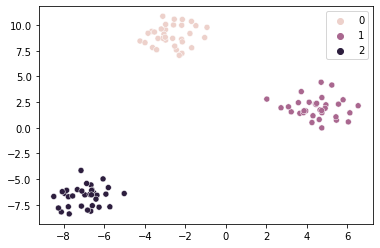

In [5]:
sns.scatterplot(X[:, 0], X[:, 1], hue=y)

In [6]:
model = KMeans(n_clusters=2)
model.fit(X)

KMeans(n_clusters=2)

In [7]:
y_gen = model.labels_

In [8]:
y_gen

array([1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1,
       1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0])

c:\users\deves\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


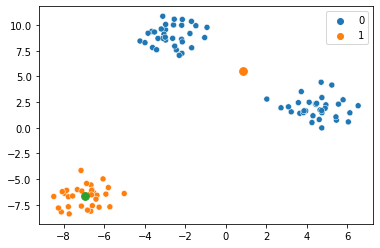

In [9]:
sns.scatterplot(X[:, 0], X[:, 1], hue=y_gen)

for centre in model.cluster_centers_:
  plt.scatter(centre[0], centre[1], s=60)

## Custom K-Means

In [10]:
import random

In [18]:
class Cluster:
  
  def __init__(self, center):
    self.center = center
    self.points = []

  def distance(self, point):
    return np.sqrt(np.sum((point - self.center) ** 2))

class CustomKMeans:

  def __init__(self, n_clusters, max_iters=20):
    self.n_clusters = n_clusters
    self.max_iters = max_iters

  def fit(self, X):
    
    clusters = []

    for i in range (self.n_clusters):
      cluster = Cluster(center = random.choice(X))
      clusters.append(cluster)



    for i in range(self.max_iters):
      labels = []
      for point in X:
        distances = []
        for cluster in clusters:
          distances.append(cluster.distance(point))

        closest_idx = np.argmin(distances)
        closest_cluster = clusters[closest_idx]
        closest_cluster.points.append(point)
        labels.append(closest_idx)

      for cluster in clusters:
        cluster.center = np.mean(cluster.points, axis=0)

    

    self.labels_ = labels
    self.cluster_centers_ = cluster.center
    print(cluster.center)
    

In [19]:
model2 = CustomKMeans(n_clusters=4)
model2.fit(X)

[-2.33143     8.05567615]


In [20]:
y_gen2 = model2.labels_

c:\users\deves\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


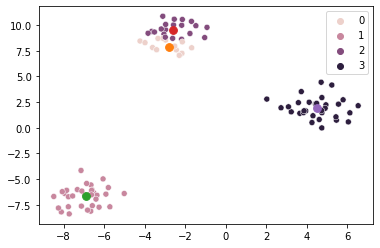

In [14]:
sns.scatterplot(X[:, 0], X[:, 1], hue=y_gen2)

for centre in model2.cluster_centers_:
  plt.scatter(centre[0], centre[1], s=60)